In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import env
import os
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
''' function to connect to CodeUp SQL database'''
def get_connection(db, user=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{env.username}:{env.password}@{env.host}/{db}'


In [3]:
def get_zillow_data():
    query= '''
            SELECT  
            bathroomcnt as bathroom,
            bedroomcnt as bedroom,
            basementsqft,
            parcelid,
            buildingqualitytypeid as quality_type, 
            calculatedfinishedsquarefeet as finished_square_ft, 
            garagecarcnt as garage,
            fips as county, 
            latitude, 
            longitude, 
            lotsizesquarefeet as lot_square_ft, 
            regionidcity as city, 
            poolcnt as pool,
            yearbuilt, 
            structuretaxvaluedollarcnt as structure_value, 
            taxvaluedollarcnt as house_value,
            landtaxvaluedollarcnt as land_value, 
            taxamount as tax, 
            logerror as log_error,
            transactiondate as transaction_date
            FROM properties_2017
            JOIN predictions_2017 USING (parcelid)
            WHERE transactiondate < '2018'
            AND propertylandusetypeid = 261
            AND longitude IS NOT NULL
            AND latitude IS NOT NULL
            
            '''
    
    
    df = pd.read_sql(query, get_connection('zillow'))

    return df

In [4]:
df= get_zillow_data()
df.head()

,bathroom,bedroom,basementsqft,parcelid,quality_type,finished_square_ft,garage,county,latitude,longitude,lot_square_ft,city,pool,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date
0,3.5,4.0,NaN,14297519,NaN,3100.0,2.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,NaN,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01
1,1.0,2.0,NaN,17052889,NaN,1465.0,1.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,NaN,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01
2,2.0,3.0,NaN,14186244,NaN,1243.0,2.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,1.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01
3,3.0,4.0,NaN,12177905,8.0,2376.0,NaN,6037.0,34245180.0,-118240722.0,13038.0,396551.0,1.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01
4,3.0,4.0,NaN,12095076,9.0,2962.0,NaN,6037.0,34145202.0,-118179824.0,63000.0,47019.0,1.0,1950.0,276684.0,773303.0,496619.0,9516.26,-0.001011,2017-01-01


In [5]:
df.shape


(52441, 20)

In [6]:
df.isnull().sum()

bathroom                  0
bedroom                   0
basementsqft          52394
parcelid                  0
quality_type          18701
finished_square_ft       82
garage                34426
county                    0
latitude                  0
longitude                 0
lot_square_ft           369
city                   1037
pool                  41345
yearbuilt               116
structure_value          84
house_value               1
land_value                1
tax                       4
log_error                 0
transaction_date          0
dtype: int64

In [7]:
# drop the duplicate transcation date using drop duplicate method
df = df.sort_values('transaction_date').drop_duplicates('parcelid',keep='last')
df.shape

(52320, 20)

In [8]:
# check for (bed and bath) == 0 
df[(df['bedroom'] == 0) & (df['bathroom'] == 0)]

,bathroom,bedroom,basementsqft,parcelid,quality_type,finished_square_ft,garage,county,latitude,longitude,lot_square_ft,city,pool,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date
124,0.0,0.0,NaN,14190895,NaN,NaN,NaN,6059.0,33879900.0,-117801183.0,39184.0,21412.0,NaN,NaN,432623.0,830145.0,397522.0,9354.84,-0.001296,2017-01-03
2694,0.0,0.0,NaN,12227894,4.0,1208.0,NaN,6037.0,33944448.0,-118268313.0,3018.0,12447.0,NaN,1990.0,52011.0,185161.0,133150.0,2558.37,-0.024661,2017-01-19
2899,0.0,0.0,NaN,12146026,NaN,280.0,NaN,6037.0,34113439.0,-118024905.0,8318.0,50749.0,1.0,1953.0,9137.0,963472.0,954335.0,11016.31,-0.661313,2017-01-20
3322,0.0,0.0,NaN,14197244,NaN,NaN,NaN,6059.0,33898674.0,-117779067.0,9730.0,21412.0,NaN,NaN,384523.0,643406.0,258883.0,7046.60,0.014172,2017-01-24
4605,0.0,0.0,NaN,14422107,NaN,NaN,NaN,6059.0,33500817.0,-117714728.0,10619.0,25459.0,NaN,NaN,1504511.0,2909706.0,1405195.0,29392.06,0.246856,2017-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,0.0,0.0,NaN,13919043,NaN,1719.0,NaN,6059.0,33803176.0,-117994180.0,6744.0,42967.0,NaN,1949.0,39661.0,125618.0,85957.0,1873.60,0.020941,2017-09-05
50078,0.0,0.0,NaN,17292931,NaN,NaN,NaN,6111.0,34127993.0,-118873772.0,43000.0,41673.0,NaN,NaN,358000.0,468439.0,110439.0,4985.16,0.080163,2017-09-06
51299,0.0,0.0,NaN,12197543,5.0,984.0,NaN,6037.0,33974459.0,-118261500.0,4000.0,12447.0,NaN,1927.0,34482.0,183027.0,148545.0,2300.32,0.238902,2017-09-12
52163,0.0,0.0,NaN,12399434,6.0,2307.0,NaN,6037.0,33959173.0,-118107658.0,11880.0,4406.0,NaN,1948.0,149000.0,499000.0,350000.0,6315.67,0.509534,2017-09-18


In [9]:
# drop the bedrooma and bathroom == 0
df = df[(df['bedroom'] > 0) & (df['bathroom'] > 0)]
df.shape

(52169, 20)

In [10]:
# handle missing value

def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)


In [11]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
basementsqft,52122,99.909908
pool,41105,78.792003
garage,34203,65.561924
quality_type,18541,35.540263
city,1028,1.970519
lot_square_ft,354,0.678564
structure_value,72,0.138013
yearbuilt,40,0.076674
finished_square_ft,8,0.015335
tax,4,0.007667


In [12]:
# function to count of number of missing values in rows.
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [13]:
nulls_by_row(df)

,parcelid,num_cols_missing,percent_cols_missing
29967,14531743,6,30.0
18942,14261567,6,30.0
6809,167636512,6,30.0
15834,14316971,6,30.0
15072,14531755,6,30.0
...,...,...,...
7084,17056961,1,5.0
12611,17097730,1,5.0
44662,17300763,1,5.0
6477,17071030,1,5.0


In [14]:
#handle missing values by dropping the columns and rows using proportion threshold
def handle_missing_values(df, prop_required_columns=0.6, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [15]:
df = handle_missing_values(df)
df.shape

(52169, 17)

In [16]:
df.head()

,bathroom,bedroom,parcelid,quality_type,finished_square_ft,county,latitude,longitude,lot_square_ft,city,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date
0,3.5,4.0,14297519,NaN,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01
1,1.0,2.0,17052889,NaN,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01
2,2.0,3.0,14186244,NaN,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01
3,3.0,4.0,12177905,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01
4,3.0,4.0,12095076,9.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,47019.0,1950.0,276684.0,773303.0,496619.0,9516.26,-0.001011,2017-01-01


In [17]:
# fips ID to names of county
df['county'] = np.where(df.county == 6037, 'Los_Angeles',
                           np.where(df.county == 6059, 'Orange', 
                                   'Ventura'))    

In [18]:
df.head()

,bathroom,bedroom,parcelid,quality_type,finished_square_ft,county,latitude,longitude,lot_square_ft,city,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date
0,3.5,4.0,14297519,NaN,3100.0,Orange,33634931.0,-117869207.0,4506.0,53571.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01
1,1.0,2.0,17052889,NaN,1465.0,Ventura,34449266.0,-119281531.0,12647.0,13091.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01
2,2.0,3.0,14186244,NaN,1243.0,Orange,33886168.0,-117823170.0,8432.0,21412.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01
3,3.0,4.0,12177905,8.0,2376.0,Los_Angeles,34245180.0,-118240722.0,13038.0,396551.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01
4,3.0,4.0,12095076,9.0,2962.0,Los_Angeles,34145202.0,-118179824.0,63000.0,47019.0,1950.0,276684.0,773303.0,496619.0,9516.26,-0.001011,2017-01-01


In [19]:
# there are many outliers and they needed to be addressed  and handled by using IQR method.

# handle outliers

def iqr_outliers(df, k=1.5, col_list=None):
    if col_list != None:
        for col in col_list:
            q1, q3 = df[col].quantile([.25, .75])
            iqr = q3 - q1
            upper_bound = q3 + k * iqr
            lower_bound = q1 - k * iqr
            df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    else:
        for col in list(df):
            q1, q3 = df[col].quantile([.25, .75])
            iqr = q3 - q1
            upper_bound = q3 + k * iqr
            lower_bound = q1 - k * iqr
            df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

    return df


In [20]:
# columns listed to handle the outliers
outlier_cols = ['finished_square_ft', 'lot_square_ft', 'structure_value', 'house_value', 'land_value','tax']
df = iqr_outliers(df, col_list=outlier_cols)

In [21]:
# handle outliers manually for bedroom, bathroom and house value
df = df[df.bedroom <= 6]
df = df[df.bathroom <= 6]
df = df[df.house_value < 2_500_000]

In [22]:
df.shape

(40298, 17)

### creating some new features
- age
- bath/bed ratio: (bathroom count / bedroom count)
- dollar per square foot

In [23]:
#recalculate yearbuilt to age of home:
df.yearbuilt = 2017 - df.yearbuilt 

In [25]:
 df['age_bin'] = pd.cut(df.yearbuilt, 
                           bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                           labels = ["0-5","5-10","10-20","20-30", "30-40", "40-50", "50-60", "60-70", "70-80", 
                                     "80-90", "90-100", "100-110", "110-120", "120-130", "130-140"])


In [26]:
# create taxrate column
df['taxrate'] = df.tax/df.house_value*100
# create  bed bath ratio column
df['bath_bed_ratio'] = df.bathroom/df.bedroom

In [27]:
#bin land tax value
df['land_tax_value_bin'] = pd.cut(df.land_value, bins = [0, 50000, 100000, 150000, 200000, 250000,350000, 450000, 650000, 800000, 1000000], labels = ["< $50,000","$100,000", "$150,000", "$200,000", "$250,000", "$350,000", '$450,000', "$650,000", "$800,000", "$1,000,000"])

In [28]:
 # dollar per square foot-structure
df['structure_dollar_per_sqft'] = df.structure_value/df.finished_square_ft

In [29]:
# bin structure dollar per sq ft
df['structure_dollar_sqft_bin'] = pd.cut(df.structure_dollar_per_sqft, 
                                             bins = [0, 25, 50, 75, 100, 150, 200, 300, 500, 1000, 1500],
                                             labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
                                            )


In [30]:
# dollar per square foot-land
df['land_dollar_per_sqft'] = df.land_value/df.lot_square_ft

df['lot_dollar_sqft_bin'] = pd.cut(df.land_dollar_per_sqft, bins = [0, 1, 5, 20, 50, 100, 250, 500, 1000, 1500, 2000],
                                       labels = ['0', '1', '5-19', '20-49', '50-99', '100-249', '250-499', '500-999', '1000-1499', '1500-2000']
                                      )

In [31]:
df.head()

,bathroom,bedroom,parcelid,quality_type,finished_square_ft,county,latitude,longitude,lot_square_ft,city,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date,age_bin,taxrate,bath_bed_ratio,land_tax_value_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin
1,1.0,2.0,17052889,NaN,1465.0,Ventura,34449266.0,-119281531.0,12647.0,13091.0,50.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,40-50,1.222517,0.500000,"$450,000",60.068259,0.2,29.730371,20-49
2,2.0,3.0,14186244,NaN,1243.0,Orange,33886168.0,-117823170.0,8432.0,21412.0,55.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,50-60,1.148823,0.666667,"$650,000",68.615447,0.2,56.865394,50-99
5,1.0,2.0,12069064,5.0,738.0,Los_Angeles,34149214.0,-118239357.0,4214.0,45457.0,95.0,18890.0,218552.0,199662.0,2366.08,0.101723,2017-01-01,90-100,1.082616,0.500000,"$200,000",25.596206,0.1,47.380636,20-49
49,2.0,3.0,12871444,4.0,1059.0,Los_Angeles,34083661.0,-117735137.0,7215.0,20008.0,62.0,51776.0,187119.0,135343.0,2481.45,0.036263,2017-01-02,60-70,1.326135,0.666667,"$150,000",48.891407,0.1,18.758559,5-19
48,1.0,2.0,11023776,4.0,776.0,Los_Angeles,34250870.0,-118421788.0,7055.0,12447.0,71.0,38030.0,164836.0,126806.0,2086.91,0.093134,2017-01-02,70-80,1.266052,0.500000,"$150,000",49.007732,0.1,17.973919,5-19


In [40]:
df.shape

(40298, 26)

In [43]:
df.house_value.max()

1008000.0

In [32]:
df['tax_value_bin'] = pd.cut(df.house_value, bins = [0, 80000, 150000, 225000, 300000, 350000, 450000, 550000, 650000, 900000, 2500000], labels = ["< $80,000","$150,000", "$225,000", "$300,000", "$350,000", "$450,000", '$550,000', "$650,000", "$900,000", "$2,500,000"])

In [33]:
df.head()

,bathroom,bedroom,parcelid,quality_type,finished_square_ft,county,latitude,longitude,lot_square_ft,city,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date,age_bin,taxrate,bath_bed_ratio,land_tax_value_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,tax_value_bin
1,1.0,2.0,17052889,NaN,1465.0,Ventura,34449266.0,-119281531.0,12647.0,13091.0,50.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,40-50,1.222517,0.500000,"$450,000",60.068259,0.2,29.730371,20-49,"$550,000"
2,2.0,3.0,14186244,NaN,1243.0,Orange,33886168.0,-117823170.0,8432.0,21412.0,55.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,50-60,1.148823,0.666667,"$650,000",68.615447,0.2,56.865394,50-99,"$650,000"
5,1.0,2.0,12069064,5.0,738.0,Los_Angeles,34149214.0,-118239357.0,4214.0,45457.0,95.0,18890.0,218552.0,199662.0,2366.08,0.101723,2017-01-01,90-100,1.082616,0.500000,"$200,000",25.596206,0.1,47.380636,20-49,"$225,000"
49,2.0,3.0,12871444,4.0,1059.0,Los_Angeles,34083661.0,-117735137.0,7215.0,20008.0,62.0,51776.0,187119.0,135343.0,2481.45,0.036263,2017-01-02,60-70,1.326135,0.666667,"$150,000",48.891407,0.1,18.758559,5-19,"$225,000"
48,1.0,2.0,11023776,4.0,776.0,Los_Angeles,34250870.0,-118421788.0,7055.0,12447.0,71.0,38030.0,164836.0,126806.0,2086.91,0.093134,2017-01-02,70-80,1.266052,0.500000,"$150,000",49.007732,0.1,17.973919,5-19,"$225,000"


In [34]:
import warnings
warnings.filterwarnings("ignore")


Text(0.5, 0, 'Log Error')

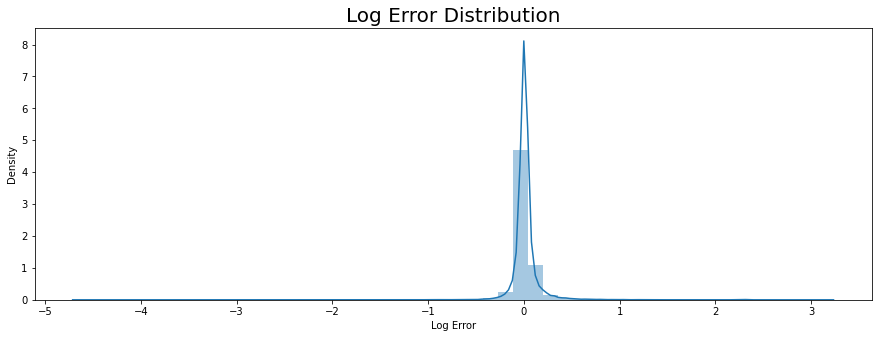

In [35]:

plt.figure(figsize=(15,5))
sns.distplot(df.log_error)
plt.title('Log Error Distribution', fontsize=20)
plt.xlabel('Log Error')

In [36]:
df.isnull().sum()

bathroom                         0
bedroom                          0
parcelid                         0
quality_type                 14010
finished_square_ft               0
county                           0
latitude                         0
longitude                        0
lot_square_ft                    0
city                           639
yearbuilt                       14
structure_value                  0
house_value                      0
land_value                       0
tax                              0
log_error                        0
transaction_date                 0
age_bin                         14
taxrate                          0
bath_bed_ratio                   0
land_tax_value_bin               0
structure_dollar_per_sqft        0
structure_dollar_sqft_bin        0
land_dollar_per_sqft             0
lot_dollar_sqft_bin              0
tax_value_bin                    0
dtype: int64

### split the data into three samples

In [56]:
from sklearn.model_selection import train_test_split

train_validate, test = train_test_split(df,test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate,test_size=0.3, random_state=123)

train.shape,validate.shape, test.shape

((22566, 27), (9672, 27), (8060, 27))

In [57]:
# function to split data

def data_split(df, stratify_by='logerror'):
    '''this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe.'''
    
    
    train_validate, test = train_test_split(df,test_size=0.2, random_state=123)
    train, validate = train_test_split(train_validate,test_size=0.3, random_state=123)
    
    return train, validate, test

In [59]:
data_split(df)
train.shape

(22566, 27)

In [74]:
def clean_zillow(df):
    df = df.sort_values('transaction_date').drop_duplicates('parcelid',keep='last')
    df = df[(df['bedroom'] > 0) & (df['bathroom'] > 0)]
    df = handle_missing_values(df)
    df.county = df.county.astype(int)
    df['county'] = np.where(df.county == 6037, 'Los_Angeles',
                           np.where(df.county == 6059, 'Orange', 
                                   'Ventura'))    
    outlier_cols = ['finished_square_ft', 'lot_square_ft', 'structure_value', 'house_value', 'land_value','tax']
    df = iqr_outliers(df, col_list=outlier_cols)
    df = df[df.bedroom <= 6]
    df = df[df.bathroom <= 6]
    df = df[df.house_value < 2500000]
    df.latitude = df.latitude / 1_000_000
    df.longitude = df.longitude / 1_000_000
    #recalculate yearbuilt to age of home:
    df.yearbuilt = 2017 - df.yearbuilt 
    df['age_bin'] = pd.cut(df.yearbuilt, 
                           bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                           labels = ["0-5","5-10","10-20","20-30", "30-40", "40-50", "50-60", "60-70", "70-80", 
                                     "80-90", "90-100", "100-110", "110-120", "120-130", "130-140"])

    # create taxrate column
    df['taxrate'] = df.tax/df.house_value*100
    # create  bed bath ratio column
    df['bath_bed_ratio'] = df.bathroom/df.bedroom
    #bin land tax value
    df['land_tax_value_bin'] = pd.cut(df.land_value, bins = [0, 50000, 100000, 150000, 200000, 250000,350000, 450000, 650000, 800000, 1000000], labels = ["< $50,000","$100,000", "$150,000", "$200,000", "$250,000", "$350,000", '$450,000', "$650,000", "$800,000", "$1,000,000"])
     # dollar per square foot-structure
    df['structure_dollar_per_sqft'] = df.structure_value/df.finished_square_ft
    # bin structure dollar per sq ft
    df['structure_dollar_sqft_bin'] = pd.cut(df.structure_dollar_per_sqft, 
                                             bins = [0, 25, 50, 75, 100, 150, 200, 300, 500, 1000, 1500],
                                             labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
                                            )
    
    # dollar per square foot-land
    df['land_dollar_per_sqft'] = df.land_value/df.lot_square_ft

    df['lot_dollar_sqft_bin'] = pd.cut(df.land_dollar_per_sqft, bins = [0, 1, 5, 20, 50, 100, 250, 500, 1000, 1500, 2000],
                                       labels = ['0', '1', '5-19', '20-49', '50-99', '100-249', '250-499', '500-999', '1000-1499', '1500-2000']
                                      )
    return df

In [75]:
def prep_zillow(df):
    df= clean_zillow(df)
    train, validate, test = data_split(df)
    return train, validate, test

In [76]:
uncleaned_df= get_zillow_data()
uncleaned_df.head()

,bathroom,bedroom,basementsqft,parcelid,quality_type,finished_square_ft,garage,county,latitude,longitude,lot_square_ft,city,pool,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date
0,3.5,4.0,NaN,14297519,NaN,3100.0,2.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,NaN,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01
1,1.0,2.0,NaN,17052889,NaN,1465.0,1.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,NaN,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01
2,2.0,3.0,NaN,14186244,NaN,1243.0,2.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,1.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01
3,3.0,4.0,NaN,12177905,8.0,2376.0,NaN,6037.0,34245180.0,-118240722.0,13038.0,396551.0,1.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01
4,3.0,4.0,NaN,12095076,9.0,2962.0,NaN,6037.0,34145202.0,-118179824.0,63000.0,47019.0,1.0,1950.0,276684.0,773303.0,496619.0,9516.26,-0.001011,2017-01-01


In [77]:
train, validate, test = prep_zillow(uncleaned_df)
train.shape,validate.shape, test.shape

((22566, 25), (9672, 25), (8060, 25))

In [86]:
train.head()

,bathroom,bedroom,parcelid,quality_type,finished_square_ft,county,latitude,longitude,lot_square_ft,city,yearbuilt,structure_value,house_value,land_value,tax,log_error,transaction_date,age_bin,taxrate,bath_bed_ratio,land_tax_value_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin
14844,2.5,4.0,14314108,NaN,2324.0,Orange,33.621391,-117.856428,8710.0,53571.0,47.0,81946.0,137733.0,55787.0,1719.36,-0.013522,2017-03-31,40-50,1.248328,0.625000,"$100,000",35.260757,0.1,6.404937,5-19
43572,2.5,3.0,14429938,NaN,1969.0,Orange,33.486643,-117.710840,4625.0,17686.0,28.0,265393.0,924803.0,659410.0,10282.84,0.085926,2017-08-08,20-30,1.111895,0.833333,"$800,000",134.785678,0.4,142.575135,100-249
17055,2.0,3.0,12481283,4.0,1656.0,Los_Angeles,33.866111,-118.138917,5458.0,12292.0,73.0,153849.0,419108.0,265259.0,5055.23,0.010107,2017-04-11,70-80,1.206188,0.666667,"$350,000",92.903986,0.3,48.600037,20-49
7546,2.0,3.0,12975881,5.0,1248.0,Los_Angeles,34.094510,-118.016875,6244.0,51861.0,84.0,95237.0,308440.0,213203.0,4758.08,0.085135,2017-02-21,80-90,1.542627,0.666667,"$250,000",76.311699,0.3,34.145259,20-49
6558,1.0,3.0,12394217,4.0,1034.0,Los_Angeles,33.981847,-118.084078,4971.0,26483.0,68.0,62655.0,271950.0,209295.0,3597.61,-0.015197,2017-02-14,60-70,1.322894,0.333333,"$250,000",60.594778,0.2,42.103199,20-49


In [101]:
train['quality_type'] = train.quality_type.fillna(round(train.quality_type.mean()))


In [102]:
# drop the rest of the null value

train.dropna(inplace=True)

In [103]:
# check null
train.isnull().sum().sort_values(ascending=False)

bathroom                     0
land_value                   0
land_dollar_per_sqft         0
structure_dollar_sqft_bin    0
structure_dollar_per_sqft    0
land_tax_value_bin           0
bath_bed_ratio               0
taxrate                      0
age_bin                      0
transaction_date             0
log_error                    0
tax                          0
house_value                  0
bedroom                      0
structure_value              0
yearbuilt                    0
city                         0
lot_square_ft                0
longitude                    0
latitude                     0
county                       0
finished_square_ft           0
quality_type                 0
parcelid                     0
lot_dollar_sqft_bin          0
dtype: int64

In [127]:
def impute_missing_value_zillow(df):
    df['quality_type'] = df.quality_type.fillna(round(df.quality_type.mean()))
    df.dropna(inplace=True)
    return df



In [87]:
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr

##  Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Text(0.5, 1.0, 'County v. Log Error')

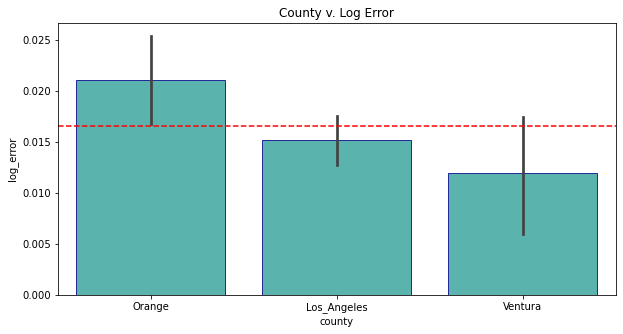

In [80]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.county, train.log_error, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.log_error.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('County v. Log Error')

#### Hypothesis Testing - ANOVA
- $H_o$: There is no significant difference in logerror for properties in LA County vs Orange County vs Ventura County. 
- $H_a$: Logerror is significantly different among the counties of LA County, Orange County and Ventura County.

In [84]:
α = 0.05
F, p = stats.f_oneway(train.log_error[train.county == 'Orange'], train.log_error[train.county == 'Los_Angeles'], train.log_error[train.county == 'Ventura'])
F, p

null_hypothesis = 'there is no significant difference in logerror for properties in LA County vs Orange County vs Ventura County'

if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that there is no significant difference in logerror for properties in LA County vs Orange County vs Ventura County


## Does house price have influence in driving up the logerror in Orange county?

<AxesSubplot:xlabel='county', ylabel='house_value'>

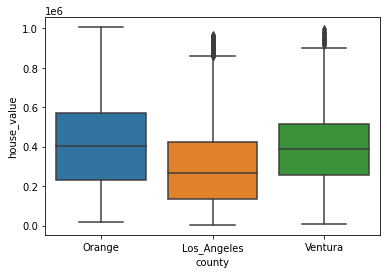

In [108]:
sns.boxplot(data = train, x='county', y='house_value')


-$H_0$ : Orange couty house price is <= average house price

-$H_a$: Orange county house price is > average house price

alpha = 0.05

In [110]:
t_orange_house_value, p_orange_house_value= stats.ttest_1samp(train[train['county'] == 'Orange'].house_value,
                                 train['house_value'].mean())

if (p_orange_house_value/2 < alpha) & (t_orange_house_value > 0):
    print('We reject the null hypothesis. Orange county average house price is >  average house price.')
else:
    print('We fail to reject the null hypothesis.')


We reject the null hypothesis. Orange county average house price is >  average house price.


###  Is there a relation between age of the house and log error

Text(0.5, 1.0, 'Age v. Log Error')

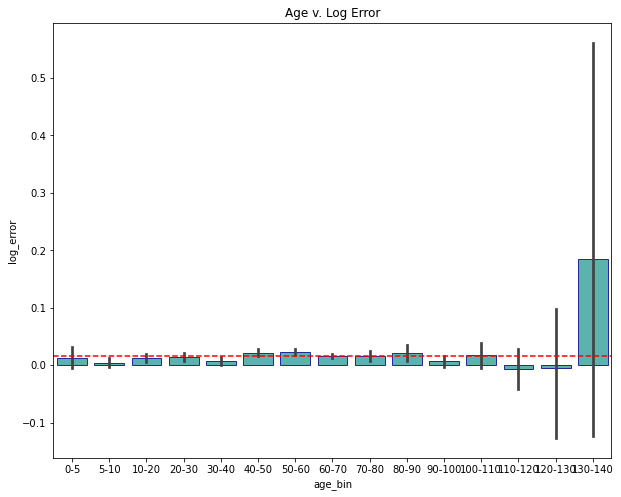

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(train.age_bin, train.log_error, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.log_error.mean()
plt.axhline(overall_rate, ls='--', color='red', )
plt.title('Age v. Log Error')

-$H_0$ : There is no significant difference in logerror for the age of the house

-$H_a$: There is significant difference in logerror for the age of the house

alpha = 0.05



In [105]:
corr, p = stats.pearsonr(train.yearbuilt, train.log_error)

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null.")

We fail to reject the null.


<AxesSubplot:xlabel='yearbuilt', ylabel='log_error'>

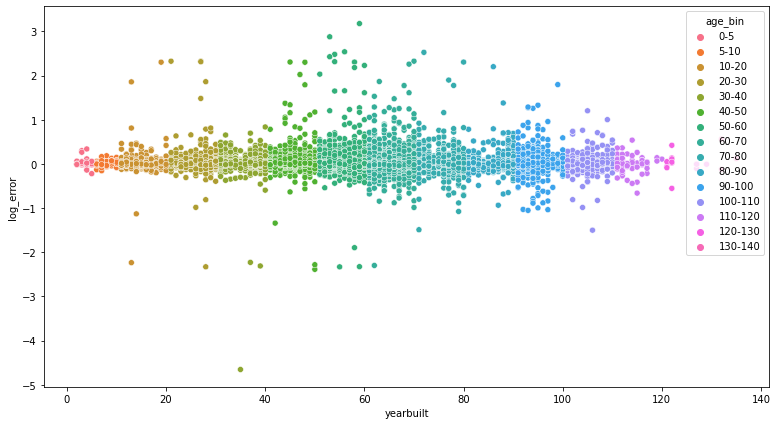

In [107]:
plt.figure(figsize=(13, 7))
sns.scatterplot(x='yearbuilt', y='log_error', data=train, hue='age_bin')

## Is there relation between land_dollar_per_sqft and log error?

Text(0.5, 1.0, 'Lot Dollar Per Square Footage v. Log Error')

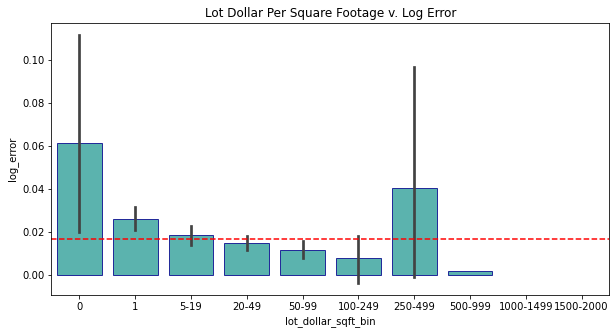

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(train.lot_dollar_sqft_bin, train.log_error, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.log_error.mean()
plt.axhline(overall_rate, ls='--', color='red', )
plt.title('Lot Dollar Per Square Footage v. Log Error')

-$H_0$ : There is no significant difference in logerror for the age of the house

-$H_a$: There is significant difference in logerror for the age of the house

alpha = 0.05



In [106]:
We 

We reject the null hypothesis.


### realtion between log error and  bath and bed ratio?

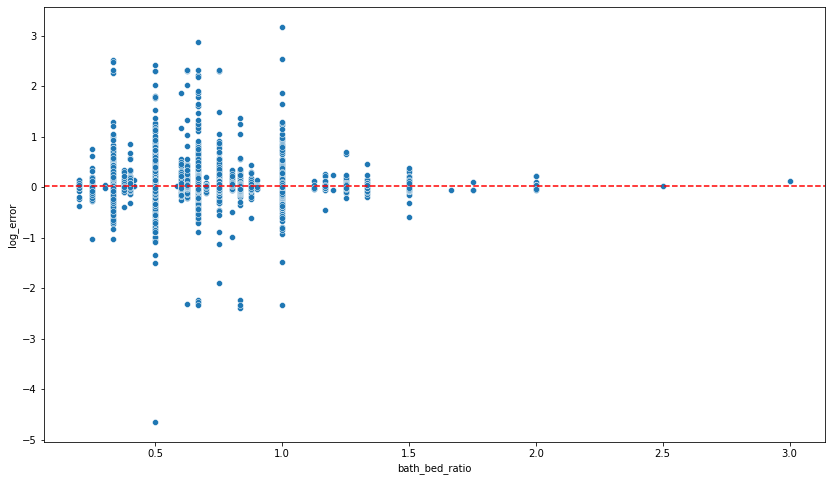

In [97]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=train)
overall_rate = train.log_error.mean()
plt.axhline(overall_rate, ls='--', color='red', )


-$H_0$ : There is no significant difference in logerror for the bath and bed ratio

-$H_a$: There is significant difference in logerror for the bath and bed ratio

alpha = 0.05




In [96]:
alpha = 0.05

corr, p = stats.pearsonr(train.bath_bed_ratio, train.log_error)

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null.")

We fail to reject the null.


## Is there a correlartion between house price and logerror?

-$H_0$ : There is no significant difference in logerror for the price of the house

-$H_a$: There is significant difference in logerror for the price of the house

alpha = 0.05




In [117]:
train['house_value_bin'] = pd.cut(train.house_value, [0, 200_000, 500_000, 100_0000,150_0000,250_0000])

<AxesSubplot:xlabel='house_value', ylabel='log_error'>

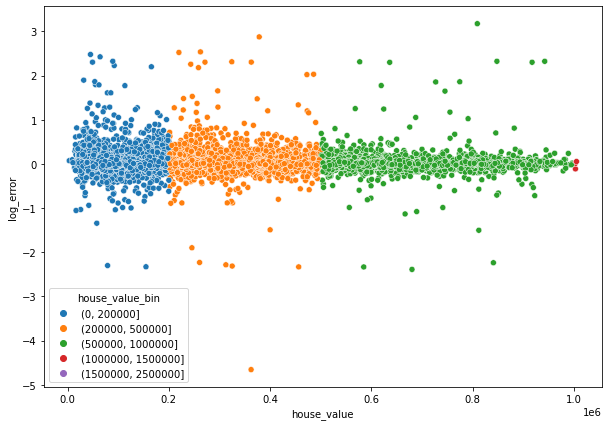

In [118]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='house_value', y='log_error', data=train, hue='house_value_bin')

In [119]:
alpha = 0.05

corr, p = stats.pearsonr(train.house_value, train.log_error)

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null.")

We reject the null hypothesis.


<AxesSubplot:>

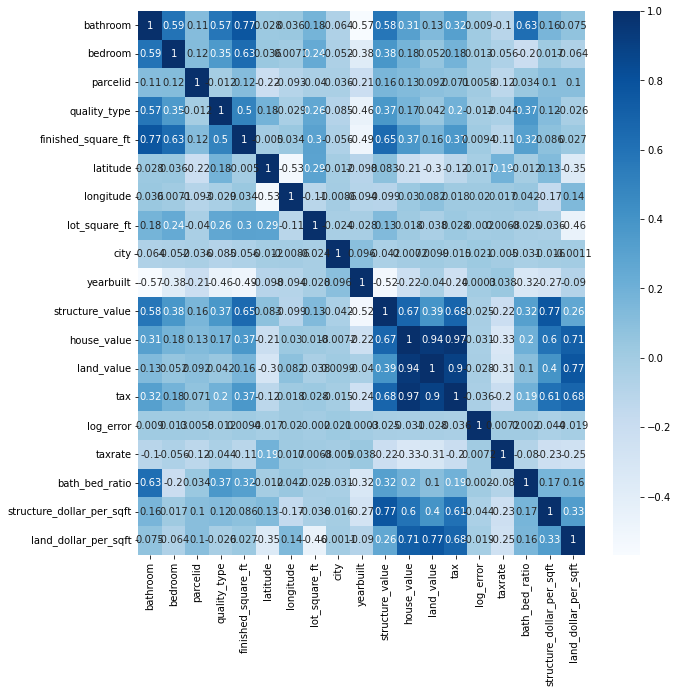

In [121]:
#heat map for correlation
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [123]:
# create dummies for the county column
county_dummies = pd.get_dummies(train['county']) 
county_dummies.head()

,Los_Angeles,Orange,Ventura
14844,0,1,0
43572,0,1,0
17055,1,0,0
7546,1,0,0
6558,1,0,0


In [124]:
train.dropcolumns

Index(['bathroom', 'bedroom', 'parcelid', 'quality_type', 'finished_square_ft',
       'county', 'latitude', 'longitude', 'lot_square_ft', 'city', 'yearbuilt',
       'structure_value', 'house_value', 'land_value', 'tax', 'log_error',
       'transaction_date', 'age_bin', 'taxrate', 'bath_bed_ratio',
       'land_tax_value_bin', 'structure_dollar_per_sqft',
       'structure_dollar_sqft_bin', 'land_dollar_per_sqft',
       'lot_dollar_sqft_bin', 'sft_bin', 'house_value_bin'],
      dtype='object')

In [136]:
# creating X_train
x_train = train[['finished_square_ft','latitude','longitude','lot_square_ft','bedroom','bathroom','structure_dollar_per_sqft',
                 'structure_value','house_value','land_value','yearbuilt','bath_bed_ratio','land_dollar_per_sqft']]
y_train = train[['log_error']]

validate = impute_missing_value_zillow(validate)
x_validate = validate[['finished_square_ft','latitude','longitude','lot_square_ft','bedroom','bathroom','structure_dollar_per_sqft',
                 'structure_value','house_value','land_value','yearbuilt','bath_bed_ratio','land_dollar_per_sqft']]
y_validate = validate[['log_error']]

test = impute_missing_value_zillow(test)
x_test = test[['finished_square_ft','latitude','longitude','lot_square_ft','bedroom','bathroom','structure_dollar_per_sqft',
                 'structure_value','house_value','land_value','yearbuilt','bath_bed_ratio','land_dollar_per_sqft']]
y_test = test[['log_error']]

county_dummies_train = pd.get_dummies(train['county']) 
county_dummies_validate = pd.get_dummies(validate['county'])
county_dummies_test = pd.get_dummies(test['county'])

In [137]:
# scale the data first
from sklearn.preprocessing import MinMaxScaler

# make the thing
scaler = MinMaxScaler()

# fit the thing on train
scaler.fit(x_train)

# use the thing (scale train)
x_train_scaled = scaler.transform(x_train)

# turn the scaled array into a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)

In [138]:
x_validate_scaled = scaler.transform(x_validate) 
x_test_scaled = scaler.transform(x_test)

x_validate_scaled = pd.DataFrame(x_validate_scaled, columns=x_validate.columns, index=x_validate.index) 
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

In [139]:
x_train_scaled_with_dummy = pd.concat([x_train_scaled,county_dummies_train],axis=1)
x_validate_scaled_with_dummy = pd.concat([x_validate_scaled,county_dummies_validate],axis=1)
x_test_scaled_with_dummy = pd.concat([x_test_scaled,county_dummies_test],axis=1)

In [143]:
x_train_scaled_with_dummy.head()

,finished_square_ft,latitude,longitude,lot_square_ft,bedroom,bathroom,structure_dollar_per_sqft,structure_value,house_value,land_value,yearbuilt,bath_bed_ratio,land_dollar_per_sqft,Los_Angeles,Orange,Ventura
14844,0.561946,0.168161,0.850746,0.650973,0.6,0.3,0.079283,0.213794,0.134232,0.072172,0.338346,0.151786,0.011283,0,1,0
43572,0.460372,0.065976,0.927257,0.299363,0.4,0.3,0.305192,0.697690,0.919854,0.885906,0.195489,0.226190,0.277857,0,1,0
17055,0.370815,0.353741,0.702290,0.371062,0.4,0.2,0.210126,0.403459,0.415089,0.354558,0.533835,0.166667,0.093887,1,0,0
7546,0.254077,0.526945,0.766426,0.438716,0.4,0.2,0.172463,0.248853,0.304625,0.284382,0.616541,0.166667,0.065589,1,0,0
6558,0.192847,0.441508,0.731109,0.329144,0.4,0.0,0.136788,0.162908,0.268202,0.279114,0.496241,0.047619,0.081168,1,0,0


In [141]:
from sklearn.cluster import KMeans, dbscan
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Cluster on Location Columns (latitude, longitude, city, county)



In [145]:
X1 = x_train_scaled_with_dummy[['latitude', 'longitude', 'Los_Angeles','Orange','Ventura']]
X2 = x_validate_scaled_with_dummy[['latitude', 'longitude', 'Los_Angeles','Orange','Ventura']]
X3 = x_test_scaled_with_dummy[['latitude', 'longitude', 'Los_Angeles','Orange','Ventura']]


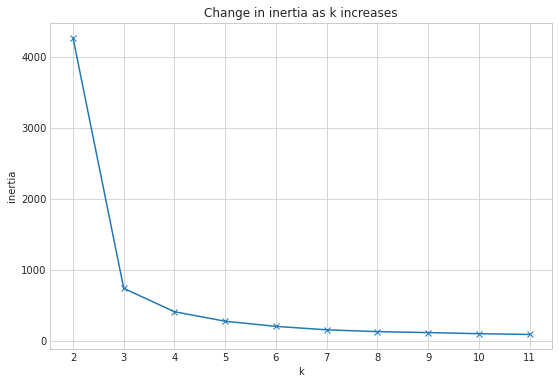

In [147]:
# elbow method to find value of k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

K=3

In [148]:
# # Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
location=kmeans.predict(X1)
location

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [152]:
x_train_scaled_with_dummy['location'] = location
x_validate_scaled_with_dummy['location'] = kmeans.predict(X2)
x_test_scaled_with_dummy['location'] = kmeans.predict(X3)
x_train_scaled_with_dummy.head()

,finished_square_ft,latitude,longitude,lot_square_ft,bedroom,bathroom,structure_dollar_per_sqft,structure_value,house_value,land_value,yearbuilt,bath_bed_ratio,land_dollar_per_sqft,Los_Angeles,Orange,Ventura,location
14844,0.561946,0.168161,0.850746,0.650973,0.6,0.3,0.079283,0.213794,0.134232,0.072172,0.338346,0.151786,0.011283,0,1,0,1
43572,0.460372,0.065976,0.927257,0.299363,0.4,0.3,0.305192,0.697690,0.919854,0.885906,0.195489,0.226190,0.277857,0,1,0,1
17055,0.370815,0.353741,0.702290,0.371062,0.4,0.2,0.210126,0.403459,0.415089,0.354558,0.533835,0.166667,0.093887,1,0,0,0
7546,0.254077,0.526945,0.766426,0.438716,0.4,0.2,0.172463,0.248853,0.304625,0.284382,0.616541,0.166667,0.065589,1,0,0,0
6558,0.192847,0.441508,0.731109,0.329144,0.4,0.0,0.136788,0.162908,0.268202,0.279114,0.496241,0.047619,0.081168,1,0,0,0


In [153]:
#cluster centroid
loc_centers= kmeans.cluster_centers_

<AxesSubplot:ylabel='log_error'>

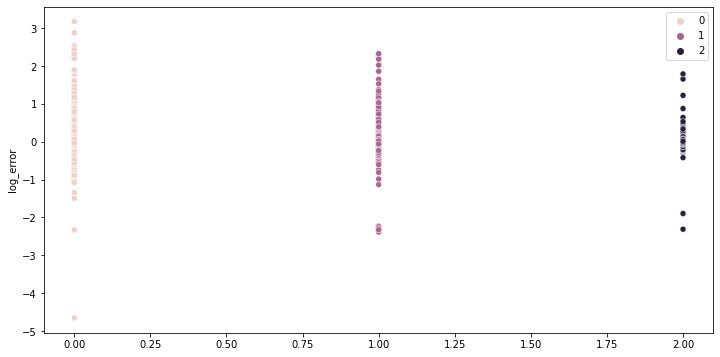

In [155]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=location, y=y_train.log_error, hue=location, data=x_train_scaled_with_dummy)


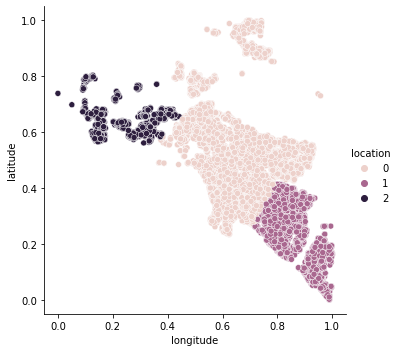

In [156]:
sns.relplot(x="longitude", y="latitude", hue="location", data=x_train_scaled_with_dummy)

𝐻0 : There is no difference in log error between cluster 1 and cluster 0.

𝐻𝑎: There is a difference in log error between cluster 1 and cluster 0.

In [157]:
#add logerror to scaled dataframe
location_cluster_log_error= pd.DataFrame({'log_error': y_train.log_error})
location_cluster_log_error['location']= location

In [160]:
t_location_cluster, p_location_cluster = stats.ttest_ind(location_cluster_log_error[location_cluster_log_error['location'] == 1].log_error, 
                                                         location_cluster_log_error[location_cluster_log_error['location'] == 0].log_error)

alpha = 0.05

if p_location_cluster < alpha:
    print('We reject the null hypothesis. There is a difference in log error between cluster 1 and cluster 0')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. There is a difference in log error between cluster 1 and cluster 0


# Cluster on value (structure_value, land_value, house_value)

In [162]:
value= x_train_scaled_with_dummy[['structure_value', 'house_value','land_value']]
value.head()

,structure_value,house_value,land_value
14844,0.213794,0.134232,0.072172
43572,0.697690,0.919854,0.885906
17055,0.403459,0.415089,0.354558
7546,0.248853,0.304625,0.284382
6558,0.162908,0.268202,0.279114


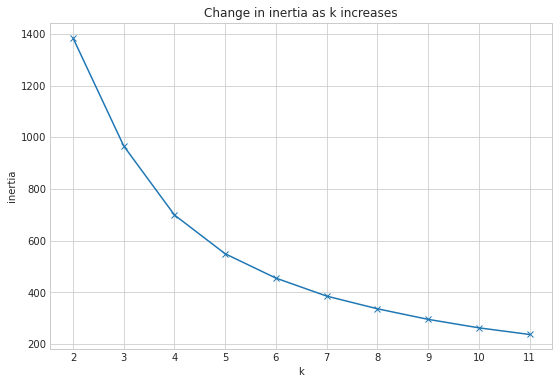

In [163]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(value).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# k=4

In [164]:
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(value)

cluster_value = kmeans3.predict(value)
cluster_value

array([3, 0, 2, ..., 1, 3, 3], dtype=int32)

In [165]:
x_train_scaled_with_dummy['cluster_value'] = cluster_value
x_train_scaled_with_dummy.head()

,finished_square_ft,latitude,longitude,lot_square_ft,bedroom,bathroom,structure_dollar_per_sqft,structure_value,house_value,land_value,yearbuilt,bath_bed_ratio,land_dollar_per_sqft,Los_Angeles,Orange,Ventura,location,cluster_value
14844,0.561946,0.168161,0.850746,0.650973,0.6,0.3,0.079283,0.213794,0.134232,0.072172,0.338346,0.151786,0.011283,0,1,0,1,3
43572,0.460372,0.065976,0.927257,0.299363,0.4,0.3,0.305192,0.697690,0.919854,0.885906,0.195489,0.226190,0.277857,0,1,0,1,0
17055,0.370815,0.353741,0.702290,0.371062,0.4,0.2,0.210126,0.403459,0.415089,0.354558,0.533835,0.166667,0.093887,1,0,0,0,2
7546,0.254077,0.526945,0.766426,0.438716,0.4,0.2,0.172463,0.248853,0.304625,0.284382,0.616541,0.166667,0.065589,1,0,0,0,2
6558,0.192847,0.441508,0.731109,0.329144,0.4,0.0,0.136788,0.162908,0.268202,0.279114,0.496241,0.047619,0.081168,1,0,0,0,2


In [166]:
# make a dataframe with logerror and cluster_value
cluster_value_logerror = pd.DataFrame({'log_error': y_train.log_error})
cluster_value_logerror['cluster_value'] = cluster_value

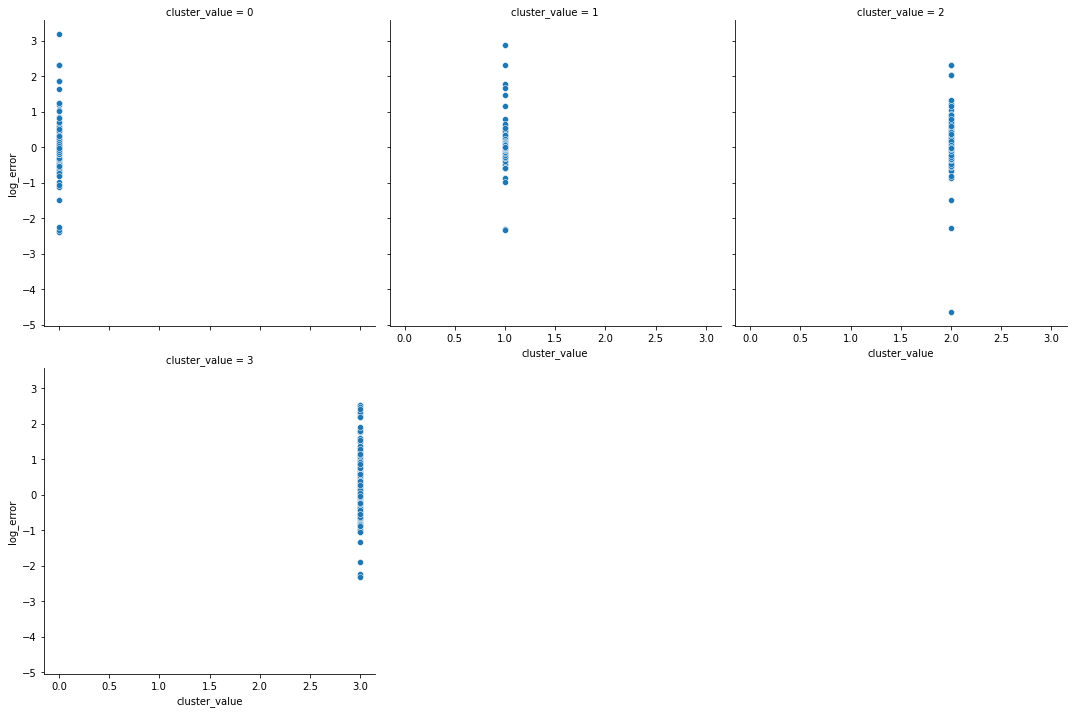

In [171]:
sns.relplot(data=cluster_value_logerror, x="cluster_value", y="log_error", col="cluster_value", col_wrap=3)

𝐻0 : There is no difference in log error between cluster 0 and cluster 1.

𝐻𝑎: There is a difference in log error between cluster 0 and cluster 1.

In [173]:
t_price_cluster, p_price_cluster = stats.ttest_ind(cluster_value_logerror[cluster_value_logerror['cluster_value'] == 0].log_error, 
                                                   cluster_value_logerror[cluster_value_logerror['cluster_value'] == 1].log_error)

alpha = 0.05

if p_price_cluster < alpha:
    print('We reject the null hypothesis. There is a difference in log error between cluster 0 and cluster 1.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


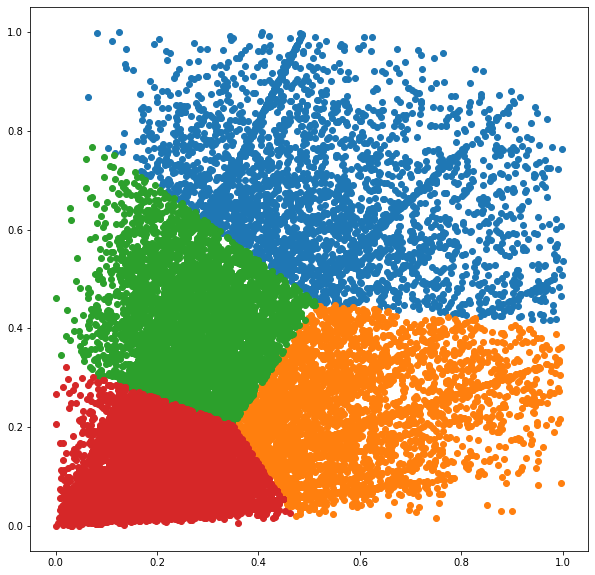

In [175]:
plt.figure(figsize=(10, 10))

for cluster_n in x_train_scaled_with_dummy.cluster_value.sort_values().unique():
    plt.scatter(x_train_scaled_with_dummy[x_train_scaled_with_dummy.cluster_value == 
                                          cluster_n].structure_value, 
                x_train_scaled_with_dummy[x_train_scaled_with_dummy.cluster_value == cluster_n].land_value, 
                label=f'cluster_{cluster_n}')


# cluster on misc(year_built,bath_bed_ratio,structure_dollar_per_sqft,land_dollar_per_sqft)	

In [176]:
misc= x_train_scaled_with_dummy[['yearbuilt', 'land_dollar_per_sqft', 'structure_dollar_per_sqft','bath_bed_ratio' ]]
misc.head()

,yearbuilt,land_dollar_per_sqft,structure_dollar_per_sqft,bath_bed_ratio
14844,0.338346,0.011283,0.079283,0.151786
43572,0.195489,0.277857,0.305192,0.226190
17055,0.533835,0.093887,0.210126,0.166667
7546,0.616541,0.065589,0.172463,0.166667
6558,0.496241,0.081168,0.136788,0.047619


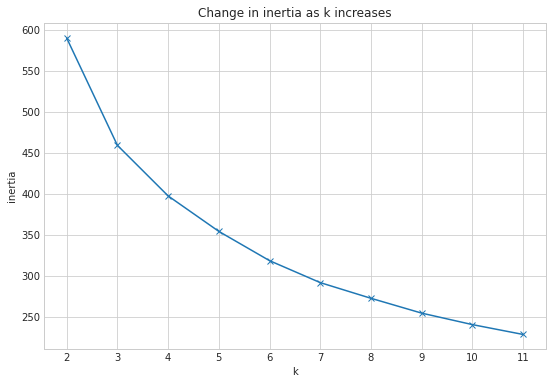

In [177]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(misc).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# k=3

In [179]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(misc)

cluster_misc = kmeans3.predict(misc)
cluster_misc

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [180]:
x_train_scaled_with_dummy['cluster_misce'] = cluster_misc
x_train_scaled_with_dummy.head()

,finished_square_ft,latitude,longitude,lot_square_ft,bedroom,bathroom,structure_dollar_per_sqft,structure_value,house_value,land_value,yearbuilt,bath_bed_ratio,land_dollar_per_sqft,Los_Angeles,Orange,Ventura,location,cluster_value,cluster_misce
14844,0.561946,0.168161,0.850746,0.650973,0.6,0.3,0.079283,0.213794,0.134232,0.072172,0.338346,0.151786,0.011283,0,1,0,1,3,1
43572,0.460372,0.065976,0.927257,0.299363,0.4,0.3,0.305192,0.697690,0.919854,0.885906,0.195489,0.226190,0.277857,0,1,0,1,0,2
17055,0.370815,0.353741,0.702290,0.371062,0.4,0.2,0.210126,0.403459,0.415089,0.354558,0.533835,0.166667,0.093887,1,0,0,0,2,1
7546,0.254077,0.526945,0.766426,0.438716,0.4,0.2,0.172463,0.248853,0.304625,0.284382,0.616541,0.166667,0.065589,1,0,0,0,2,0
6558,0.192847,0.441508,0.731109,0.329144,0.4,0.0,0.136788,0.162908,0.268202,0.279114,0.496241,0.047619,0.081168,1,0,0,0,2,1


In [182]:
#make a dataframe with logerror and cluster misc
cluster3= pd.DataFrame({'log_error': y_train.log_error})
cluster3['cluster_misc']= cluster_misc
cluster3.head()

,log_error,cluster_misc
14844,-0.013522,1
43572,0.085926,2
17055,0.010107,1
7546,0.085135,0
6558,-0.015197,1


𝐻0 : There is no difference in log error between cluster 0 and cluster 1.

𝐻𝑎: There is a difference in log error between cluster 0 and cluster 1.

In [186]:
t_misc, p_misc= stats.ttest_ind(cluster3[cluster3['cluster_misc']== 0].log_error,
                                cluster3[cluster3['cluster_misc']== 1].log_error)

alpha =0.05

if p_misc < alpha:
    print('We reject the null hypothesis. There is a difference in log error between cluster 0 and cluster 1')
else:
    print('We fail to reject the null hypothesis.')


We reject the null hypothesis. There is a difference in log error between cluster 0 and cluster 1


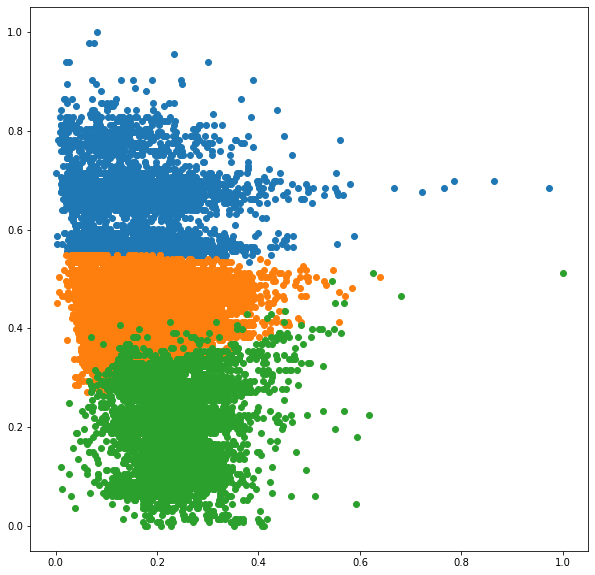

In [187]:
plt.figure(figsize=(10, 10))

for cluster_n in x_train_scaled_with_dummy.cluster_misce.sort_values().unique():
    plt.scatter(x_train_scaled_with_dummy[x_train_scaled_with_dummy.cluster_misce == 
                                          cluster_n].structure_dollar_per_sqft, 
                x_train_scaled_with_dummy[x_train_scaled_with_dummy.cluster_misce == cluster_n].yearbuilt, 
                label=f'cluster_{cluster_n}')

# select k best

In [188]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

kbest = SelectKBest(f_regression, k=5)
kbest.fit(x_train_scaled_with_dummy, y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x7fee0d640280>)

In [189]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=x_train_scaled_with_dummy.columns)
kbest_results

,p,f
finished_square_ft,1.634036e-01,1.942571
latitude,1.168305e-02,6.359399
longitude,3.461617e-03,8.548473
lot_square_ft,7.701288e-01,0.085387
bedroom,4.997116e-02,3.842845
bathroom,1.782316e-01,1.812423
structure_dollar_per_sqft,7.278168e-11,42.484313
structure_value,2.293065e-04,13.578733
house_value,2.899038e-06,21.893529
land_value,3.015606e-05,17.415179


In [190]:
x_train_scaled_with_dummy.columns[kbest.get_support()]

Index(['structure_dollar_per_sqft', 'structure_value', 'house_value',
       'land_value', 'cluster_value'],
      dtype='object')

 # Recursive feature elimination

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=5)

rfe.fit(x_train_scaled_with_dummy,y_train)  

feature_mask = rfe.support_

rfe_feature = x_train_scaled_with_dummy.iloc[:,feature_mask].columns.tolist()
rfe_feature

['bedroom',
 'bathroom',
 'structure_dollar_per_sqft',
 'land_value',
 'bath_bed_ratio']

In [193]:
# using select k best features
x_train_kbest= x_train_scaled_with_dummy[['structure_dollar_per_sqft', 'structure_value', 'house_value',
       'land_value', 'cluster_value']]
x_train_kbest.head()

,structure_dollar_per_sqft,structure_value,house_value,land_value,cluster_value
14844,0.079283,0.213794,0.134232,0.072172,3
43572,0.305192,0.697690,0.919854,0.885906,0
17055,0.210126,0.403459,0.415089,0.354558,2
7546,0.172463,0.248853,0.304625,0.284382,2
6558,0.136788,0.162908,0.268202,0.279114,2


In [194]:
#Establish baselines for the train and validation subsets
from math import sqrt
from sklearn.metrics import mean_squared_error

baseline = train.log_error.mean()

train['baseline'] = baseline
validate['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.log_error, train.baseline))
validate_rmse = sqrt(mean_squared_error(validate.log_error, validate.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))

Train baseline RMSE: 0.16038712270931066.
Validation baseline RMSE: 0.16086423042849432.


### modeling
- linear regression
- lasso-lars
- polynomial regression
- tweedie regressor
- interaction only polynomial


In [203]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

predictions_train_kbest_model = pd.DataFrame({'actual': train.log_error})
predictions_train_kbest_model['baseline'] = baseline

lm = LinearRegression()
lm.fit(x_train_kbest, y_train)
predictions_train_kbest_model['lm'] = lm.predict(x_train_kbest)

lars = LassoLars(alpha=1.0)
lars.fit(x_train_kbest, y_train)
predictions_train_kbest_model['lasso_lars'] = lars.predict(x_train_kbest)

glm = TweedieRegressor(power=0, alpha=1)
glm.fit(x_train_kbest, y_train)
predictions_train_kbest_model['glm'] = glm.predict(x_train_kbest)

poly = PolynomialFeatures(degree=2,interaction_only=False)
poly.fit(x_train_kbest)
x_train_kbest_poly = pd.DataFrame(
    poly.transform(x_train_kbest),
    columns=poly.get_feature_names(x_train_kbest.columns),
    index=train.index)
lm1 = LinearRegression()
lm1.fit(x_train_kbest_poly, y_train)
x_train_poly = poly.transform(x_train_kbest)
predictions_train_kbest_model['polynomial_degree_2'] = lm1.predict(x_train_kbest_poly)

poly1 = PolynomialFeatures(degree=2, interaction_only=True)
poly1.fit(x_train_kbest)
x_train_kbest_poly1 = pd.DataFrame(
    poly1.transform(x_train_kbest),
    columns=poly1.get_feature_names(x_train_kbest.columns),
    index=train.index)
lm1.fit(x_train_kbest_poly1, y_train)
x_train_poly1 = poly1.transform(x_train_kbest)
predictions_train_kbest_model['polynomial_only_interaction'] = lm1.predict(x_train_kbest_poly1)
predictions_train_kbest_model.head()

,actual,baseline,lm,lasso_lars,glm,polynomial_degree_2,polynomial_only_interaction
14844,-0.013522,0.016592,0.027439,0.016592,0.019461,0.026418,0.024240
43572,0.085926,0.016592,0.005448,0.016592,0.011015,0.011451,0.018431
17055,0.010107,0.016592,0.014833,0.016592,0.016593,0.012742,0.015074
7546,0.085135,0.016592,0.014545,0.016592,0.016778,0.012926,0.016275
6558,-0.015197,0.016592,0.015937,0.016592,0.016854,0.016788,0.019020


# Evaluate

In [204]:
print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))

Train baseline RMSE: 0.16038712270931066.
Validation baseline RMSE: 0.16086423042849432.


In [205]:
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions_train_kbest_model.actual, y_predicted))
predictions_train_kbest_model.apply(calculate_rmse).sort_values()

actual                         0.000000
polynomial_degree_2            0.160061
polynomial_only_interaction    0.160121
lm                             0.160195
glm                            0.160319
baseline                       0.160387
lasso_lars                     0.160387
dtype: float64

In [206]:
def calculate_r2(y_predicted):
    return r2_score(predictions_train_kbest_model.actual, y_predicted)

predictions_train_kbest_model.apply(calculate_r2).sort_values()

baseline                       0.000000
lasso_lars                     0.000000
glm                            0.000852
lm                             0.002400
polynomial_only_interaction    0.003317
polynomial_degree_2            0.004067
actual                         1.000000
dtype: float64

# features using from RFE

In [208]:
x_train_rfe = x_train_scaled_with_dummy[['bedroom',
 'bathroom',
 'structure_dollar_per_sqft',
 'land_value',
 'bath_bed_ratio']]
x_train_rfe.head()

,bedroom,bathroom,structure_dollar_per_sqft,land_value,bath_bed_ratio
14844,0.6,0.3,0.079283,0.072172,0.151786
43572,0.4,0.3,0.305192,0.885906,0.226190
17055,0.4,0.2,0.210126,0.354558,0.166667
7546,0.4,0.2,0.172463,0.284382,0.166667
6558,0.4,0.0,0.136788,0.279114,0.047619


In [209]:
predictions_train_rfe_model = pd.DataFrame({'actual': train.log_error})
predictions_train_rfe_model['baseline'] = baseline

lm = LinearRegression()
lm.fit(x_train_rfe, y_train)
predictions_train_rfe_model['lm'] = lm.predict(x_train_rfe)

lars = LassoLars(alpha=1.0)
lars.fit(x_train_rfe, y_train)
predictions_train_rfe_model['lasso_lars'] = lars.predict(x_train_rfe)

glm = TweedieRegressor(power=0, alpha=1)
glm.fit(x_train_rfe, y_train)
predictions_train_rfe_model['glm'] = glm.predict(x_train_rfe)

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(x_train_rfe)
x_train_rfe_poly = pd.DataFrame(
    poly.transform(x_train_rfe),
    columns=poly.get_feature_names(x_train_rfe.columns),
    index=train.index)
lm1 = LinearRegression()
lm1.fit(x_train_rfe_poly, y_train)
x_train_poly = poly.transform(x_train_rfe)
predictions_train_rfe_model['polynomial_degree_2'] = lm1.predict(x_train_rfe_poly)

poly1 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly1.fit(x_train_rfe)
x_train_rfe_poly1 = pd.DataFrame(
    poly1.transform(x_train_rfe),
    columns=poly1.get_feature_names(x_train_rfe.columns),
    index=train.index)
lm1.fit(x_train_rfe_poly1, y_train)
x_train_poly1 = poly1.transform(x_train_rfe)
predictions_train_rfe_model['polynomial_only_interaction'] = lm1.predict(x_train_rfe_poly1)
predictions_train_rfe_model.head()

,actual,baseline,lm,lasso_lars,glm,polynomial_degree_2,polynomial_only_interaction
14844,-0.013522,0.016592,0.028347,0.016592,0.016912,0.024175,0.024013
43572,0.085926,0.016592,0.001518,0.016592,0.015926,-0.000967,0.003762
17055,0.010107,0.016592,0.012466,0.016592,0.016469,0.009716,0.009690
7546,0.085135,0.016592,0.016041,0.016592,0.016558,0.013610,0.013361
6558,-0.015197,0.016592,0.015664,0.016592,0.016536,0.014360,0.013356


In [210]:
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions_train_rfe_model.actual, y_predicted))
predictions_train_rfe_model.apply(calculate_rmse).sort_values()

actual                         0.000000
polynomial_degree_2            0.159997
polynomial_only_interaction    0.160017
lm                             0.160188
glm                            0.160378
baseline                       0.160387
lasso_lars                     0.160387
dtype: float64

In [211]:
def calculate_r2(y_predicted):
    return r2_score(predictions_train_rfe_model.actual, y_predicted)

predictions_train_rfe_model.apply(calculate_r2).sort_values()

baseline                       0.000000
lasso_lars                     0.000000
glm                            0.000115
lm                             0.002477
polynomial_only_interaction    0.004612
polynomial_degree_2            0.004854
actual                         1.000000
dtype: float64

# top 3 models using rmse using RFE features
- regression
- polynomial 2nd degree
- interaction only polynomial

In [212]:
#  the validate sample
x_validate_rfe = x_validate_scaled_with_dummy[['bedroom','bathroom','structure_dollar_per_sqft','land_value','bath_bed_ratio']]
predictions_validate_rfe_model = pd.DataFrame({'actual': validate.log_error})

lm.fit(x_train_rfe, y_train)
predictions_validate_rfe_model['lm'] = lm.predict(x_validate_rfe)

lm1 = LinearRegression()
lm1.fit(x_train_rfe_poly, y_train)
predictions_validate_rfe_model['polynomial_degree_2'] = lm1.predict(poly.transform(x_validate_rfe))

lm1.fit(x_train_rfe_poly1, y_train)
predictions_validate_rfe_model['polynomial_only_interaction'] = lm1.predict(poly1.transform(x_validate_rfe))
predictions_validate_rfe_model.head()

,actual,lm,polynomial_degree_2,polynomial_only_interaction
1103,0.037393,0.020523,0.013716,0.014517
7910,0.004254,0.017595,0.022763,0.021916
1339,0.005471,0.007768,0.007771,0.005608
45475,-0.006522,0.012451,0.007505,0.007415
105,0.007143,0.024152,0.022374,0.021033


In [213]:
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions_validate_rfe_model.actual, y_predicted))
predictions_validate_rfe_model.apply(calculate_rmse).sort_values()

actual                         0.000000
lm                             0.160502
polynomial_only_interaction    0.160557
polynomial_degree_2            0.160598
dtype: float64

In [217]:
# fit the best model on test set i.e linear regression
x_test_rfe = x_test_scaled_with_dummy[['bedroom','bathroom','structure_dollar_per_sqft','land_value','bath_bed_ratio']]
lm_test_rfe = LinearRegression()
lm_test_rfe.fit(x_train_rfe, y_train)

LinearRegression()

In [219]:
test_prediction = lm.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test,test_prediction))
print(f'test RMSE {rmse}')

test RMSE 0.17225323653500227


# the model did not beat the baseline 
- According to the observation made on test RMSE log error of 0.1723 is expected on furture unseen data

# Conclusion
 
## Summary
Three different clusters (location, value and miscellenous) were created. Bedroom,Bathroom,structure_dollar_per_sqft,land_value,bath_bed_ratio were top five features using Recursive Feature Elimination method which were used to predict the log error. However, the best model with RMSE of 0.17 didnot beat the baseline RMSE of 0.16



# Recommendations
- None of the clusters created were best features according to RFE method. So more clusters could be explored using different features in the future.


# Next Steps
- I would take different approach in creating the clusters.
- Changing some parameters in the models used could have resulted in better performance. So I would try tweaking the parameters in the model.